In [82]:
#This section is importing all libraries & data used for the project

#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#importing the data file
data = pd.read_csv("CreditCard_train.csv")
#displaying the first 10 rows of the data
data.head(10)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [83]:
#displaying the columns of the data file
data.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

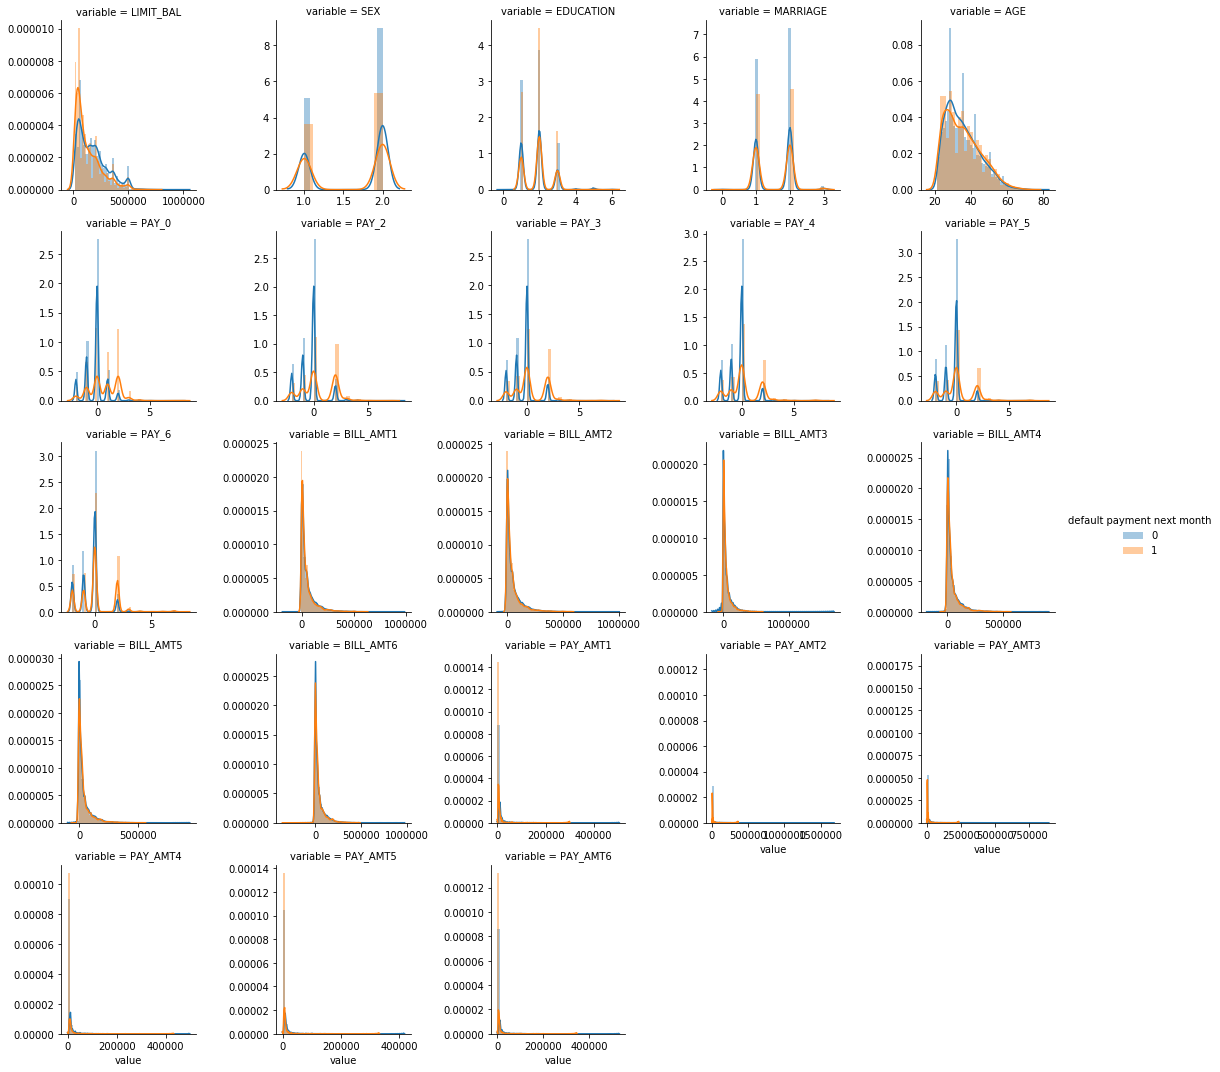

In [84]:
#This section is visualizing & exploring the data

#for simplification
output = 'default payment next month'

#Conducting exploratory data analysis (EDA)
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
#Removing irrelevant columns from the data 
cols.remove( "ID")
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()


In [85]:
#Principa Component Analysis
categories = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for element in categories:
    data[element] = data[element].astype('category')
    
for element in categories:
    data = pd.concat((data, pd.get_dummies(data[element], prefix=[element])), axis=1)
    
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,['PAY_6']_-2,['PAY_6']_-1,['PAY_6']_0,['PAY_6']_2,['PAY_6']_3,['PAY_6']_4,['PAY_6']_5,['PAY_6']_6,['PAY_6']_7,['PAY_6']_8
0,1,20000,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,0,...,0,0,1,0,0,0,0,0,0,0
23996,23997,20000,1,2,1,25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23997,23998,10000,1,2,2,26,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23998,23999,20000,1,5,2,26,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
#displaying the columns of the data file
print(list(data.columns))
data

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', "['SEX']_1", "['SEX']_2", "['EDUCATION']_0", "['EDUCATION']_1", "['EDUCATION']_2", "['EDUCATION']_3", "['EDUCATION']_4", "['EDUCATION']_5", "['EDUCATION']_6", "['MARRIAGE']_0", "['MARRIAGE']_1", "['MARRIAGE']_2", "['MARRIAGE']_3", "['PAY_0']_-2", "['PAY_0']_-1", "['PAY_0']_0", "['PAY_0']_1", "['PAY_0']_2", "['PAY_0']_3", "['PAY_0']_4", "['PAY_0']_5", "['PAY_0']_6", "['PAY_0']_7", "['PAY_0']_8", "['PAY_2']_-2", "['PAY_2']_-1", "['PAY_2']_0", "['PAY_2']_1", "['PAY_2']_2", "['PAY_2']_3", "['PAY_2']_4", "['PAY_2']_5", "['PAY_2']_6", "['PAY_2']_7", "['PAY_2']_8", "['PAY_3']_-2", "['PAY_3']_-1", "['PAY_3']_0", "['PAY_3']_1", "['PAY_3']_2", "['PAY_3']_3", "['PAY_3']_4", "['PAY_3']_5", "['PAY_3']_6", "['PA

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,['PAY_6']_-2,['PAY_6']_-1,['PAY_6']_0,['PAY_6']_2,['PAY_6']_3,['PAY_6']_4,['PAY_6']_5,['PAY_6']_6,['PAY_6']_7,['PAY_6']_8
0,1,20000,2,2,1,24,2,2,-1,-1,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23996,80000,1,2,1,25,1,2,2,0,...,0,0,1,0,0,0,0,0,0,0
23996,23997,20000,1,2,1,25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23997,23998,10000,1,2,2,26,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23998,23999,20000,1,5,2,26,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.preprocessing import StandardScaler

bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_values = data.loc[:, bill].values
target_values = data.loc[:, ['default payment next month']].values
bill_values = StandardScaler().fit_transform(bill_values)
bill_values

array([[-0.64260509, -0.64727168, -0.66984012, -0.67177126, -0.66288023,
        -0.65191478],
       [-0.65954984, -0.66684158, -0.64061403, -0.61989188, -0.60562493,
        -0.59678798],
       [-0.29399193, -0.49200571, -0.48110963, -0.44454526, -0.41516611,
        -0.38906085],
       ...,
       [-0.57420665, -0.55018959, -0.5358664 , -0.39420387, -0.38765705,
        -0.49679563],
       [-0.41340357, -0.40308131, -0.39554301, -0.03834173, -0.66288023,
        -0.65191478],
       [-0.67521444, -0.67644889, -0.64963262, -0.64094806, -0.65643383,
        -0.63127392]])

In [88]:
from sklearn.decomposition import PCA

pca_bill = PCA(n_components=2)
principalComponents_bill = pca_bill.fit_transform(bill_values)
principalDf_bill = pd.DataFrame(data = principalComponents_bill
                                , columns = ['bill_pc1', 'bill_pc2'])
print(principalDf_bill)
pca_bill.explained_variance_ratio_

       bill_pc1  bill_pc2
0     -1.611216  0.010071
1     -1.546814 -0.066453
2     -1.028676  0.013599
3     -0.233383  0.177654
4     -0.960107 -0.227755
...         ...       ...
23995  1.058638  0.135535
23996 -1.031067 -0.121125
23997 -1.198402 -0.141770
23998 -1.043755  0.152590
23999 -1.604194 -0.037400

[24000 rows x 2 columns]


array([0.90774248, 0.04974495])

In [89]:
pay = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_values = data.loc[:, pay].values
pay_values = StandardScaler().fit_transform(pay_values)
pay_values

array([[-0.3678535 , -0.24649878, -0.30874059, -0.31871886, -0.31325859,
        -0.29435041],
       [-0.3678535 , -0.23154441, -0.24661057, -0.25152793, -0.31325859,
        -0.18090744],
       [-0.26711195, -0.20750202, -0.24661057, -0.25152793, -0.24777108,
        -0.01074299],
       ...,
       [-0.28157945, -0.17384267, -0.22797157, -0.29721776, -0.19407132,
        -0.23762892],
       [-0.16510948, -0.20908882, -0.24064609, -0.25152793, -0.31325859,
        -0.29435041],
       [-0.29485238, -0.22192745, -0.24661057, -0.28512339, -0.24777108,
        -0.23762892]])

In [90]:
pca_pay = PCA(n_components=6)
principalComponents_pay = pca_pay.fit_transform(pay_values)
principalDf_pay = pd.DataFrame(data = principalComponents_pay
                               , columns = ['pay_pc1', 'pay_pc2', 'pay_pc3', 'pay_pc4', 'pay_pc5', 'pay_pc6'])
print(principalDf_pay)
pca_pay.explained_variance_ratio_

        pay_pc1   pay_pc2   pay_pc3   pay_pc4   pay_pc5   pay_pc6
0     -0.753442  0.056474  0.016774  0.028364 -0.043054  0.062851
1     -0.650050 -0.004134 -0.014271  0.023947 -0.119676  0.078670
2     -0.500570  0.038109 -0.131170 -0.038420 -0.161752  0.055923
3     -0.560491  0.045290 -0.003965  0.025886  0.009334  0.045229
4      0.554640  0.219275  0.637498  0.538860  0.123918  1.227617
...         ...       ...       ...       ...       ...       ...
23995 -0.407177 -0.084874 -0.035315  0.049919  0.036277 -0.098074
23996 -0.581877  0.059387 -0.009436  0.068554 -0.010585  0.085266
23997 -0.573232  0.106235  0.023023  0.044355 -0.033970  0.020399
23998 -0.599453  0.009161 -0.046206  0.047729  0.102597  0.050621
23999 -0.624371  0.056763 -0.001320  0.031416 -0.038328  0.025310

[24000 rows x 6 columns]


array([0.30061902, 0.14779329, 0.14538284, 0.14006904, 0.13443381,
       0.131702  ])

In [91]:
data = pd.concat([data, principalDf_bill], axis = 1)
data = data.drop(bill, axis=1)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', '['SEX']_1', '['SEX']_2',
       '['EDUCATION']_0', '['EDUCATION']_1', '['EDUCATION']_2',
       '['EDUCATION']_3', '['EDUCATION']_4', '['EDUCATION']_5',
       '['EDUCATION']_6', '['MARRIAGE']_0', '['MARRIAGE']_1', '['MARRIAGE']_2',
       '['MARRIAGE']_3', '['PAY_0']_-2', '['PAY_0']_-1', '['PAY_0']_0',
       '['PAY_0']_1', '['PAY_0']_2', '['PAY_0']_3', '['PAY_0']_4',
       '['PAY_0']_5', '['PAY_0']_6', '['PAY_0']_7', '['PAY_0']_8',
       '['PAY_2']_-2', '['PAY_2']_-1', '['PAY_2']_0', '['PAY_2']_1',
       '['PAY_2']_2', '['PAY_2']_3', '['PAY_2']_4', '['PAY_2']_5',
       '['PAY_2']_6', '['PAY_2']_7', '['PAY_2']_8', '['PAY_3']_-2',
       '['PAY_3']_-1', '['PAY_3']_0', '['PAY_3']_1', '['PAY_3']_2',
       '['PAY_3']_3', '['PAY_3']_4', '['PAY_3'

In [92]:
covariates = list(data.columns)
covariates.remove('ID')
covariates.remove('default payment next month')

for element in categories:
    covariates.remove(element)

X_logit = data[covariates]
Y_logit = data['default payment next month']

In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=700)
rfe = RFE(logreg, 10)

rfe = rfe.fit(X_logit, Y_logit.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True  True False False False  True False False False False False False
 False  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False False
 False  True False False False False False False False False False False
 False False False]
[56 49 50 51 52 53 55 54 40 30 67  1  1  1 13 14 47  1 25 26 24  3 15  2
 16  1  1  1 66 68 59 63 38  4 37 72 35 36 12  7 58 64 75 29 28 34 73  9
 11 33 57 61  8 76 32 48 42 71 20 41 10 60 78 27 77 46 31 45  1  1 17 65
 70  1 74 23 18 19 22  5 21 62  6 43 69 44 39]


In [94]:
X_logit = X_logit.iloc[:, list(rfe.support_)]
to_keep = data.loc[:, ['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                        'bill_pc1', 'bill_pc2']]
X_logit = pd.concat((X_logit, to_keep), axis=1)

In [95]:
import statsmodels.api as sm

logit_model=sm.Logit(Y_logit,X_logit)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.459093
         Iterations 7
                              Results: Logit
Model:              Logit                      Pseudo R-squared: 0.136     
Dependent Variable: default payment next month AIC:              22074.4863
Date:               2020-01-05 14:14           BIC:              22228.1167
No. Observations:   24000                      Log-Likelihood:   -11018.   
Df Model:           18                         LL-Null:          -12759.   
Df Residuals:       23981                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
-----------------------------------------------------------------------------
                    Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------
['EDUCATION

In [96]:
data.columns
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
cols.remove('ID')
cols.remove('default payment next month')
print(cols)
print(data.shape)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "['SEX']_1", "['SEX']_2", "['EDUCATION']_0", "['EDUCATION']_1", "['EDUCATION']_2", "['EDUCATION']_3", "['EDUCATION']_4", "['EDUCATION']_5", "['EDUCATION']_6", "['MARRIAGE']_0", "['MARRIAGE']_1", "['MARRIAGE']_2", "['MARRIAGE']_3", "['PAY_0']_-2", "['PAY_0']_-1", "['PAY_0']_0", "['PAY_0']_1", "['PAY_0']_2", "['PAY_0']_3", "['PAY_0']_4", "['PAY_0']_5", "['PAY_0']_6", "['PAY_0']_7", "['PAY_0']_8", "['PAY_2']_-2", "['PAY_2']_-1", "['PAY_2']_0", "['PAY_2']_1", "['PAY_2']_2", "['PAY_2']_3", "['PAY_2']_4", "['PAY_2']_5", "['PAY_2']_6", "['PAY_2']_7", "['PAY_2']_8", "['PAY_3']_-2", "['PAY_3']_-1", "['PAY_3']_0", "['PAY_3']_1", "['PAY_3']_2", "['PAY_3']_3", "['PAY_3']_4", "['PAY_3']_5", "['PAY_3']_6", "['PAY_3']_7", "['PAY_3']_8", "['PAY_4']_-2", "['PAY_4']_-1", "['PAY_4']_0", "['PAY_4']_1", "['PAY_4']_2", "['PAY_4']_3

In [97]:
## RANDOM FOREST CLASSIFIER ##

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#X and y are the predictor and output variables of the forest
X = data[cols].values    
y = data[ output ].values
RSEED=5

#Carrying out the testing & fitting of the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED, test_size=0.25)
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

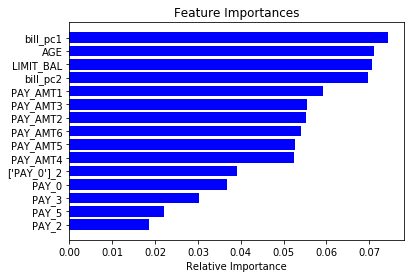

one of the 4 most important features is LIMIT_BAL
one of the 4 most important features is AGE
one of the 4 most important features is bill_pc1
one of the 4 most important features is bill_pc2


/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the accuracy of the Random Forest model with all features is 0.7956666666666666.
the accuracy of the Random Forest model with only the top 4 most important features is 0.7446666666666667.


In [98]:
#Dimensionality reduction for Random Forest
features = cols
importances = model_RF.feature_importances_
indices = np.argsort(importances)[-15:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

from sklearn.feature_selection import SelectFromModel
# Creating a selector object that will use the random forest classifier to identify
# features that have an importance greater than 0.06
sfm = SelectFromModel(model_RF, threshold=0.06)

# Training the selector
sfm.fit(X_train, y_train)

# Displaying the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f'one of the 4 most important features is {cols[feature_list_index]}')

# Transforming both the training & testing data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Creating a new random forest classifier for the most important features only
model_RF_important = RandomForestClassifier(random_state=RSEED)

# Training the new classifier on the new dataset containing the most important features only
model_RF_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = model_RF.predict(X_test)

#Accuracy of model prior to any feature selection (all features) 
a1=accuracy_score(y_test, y_pred)
print(f'the accuracy of the Random Forest model with all features is {a1}.')

# Apply important features classifier to the testing data
y_important_pred = model_RF_important.predict(X_important_test)

# Accuracy of model with feature selection
a2=accuracy_score(y_test, y_important_pred)
print(f'the accuracy of the Random Forest model with only the top 4 most important features is {a2}.')

/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tom/opt/anaconda3/lib/python3

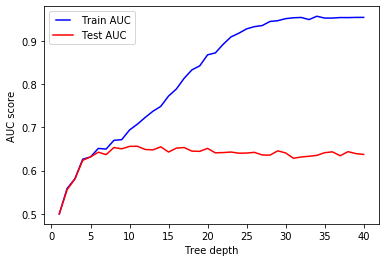

The optimum maximum depth of the tree is 11.0.


In [99]:
## RANDOM FOREST CLASSIFIER ##

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Hyperparamter optimization of max_depth
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results_rf = []
test_results_rf = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results_rf.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results_rf.append(roc_auc)

#plotting the AUC curves
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_rf, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results_rf, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#Displaying the optimumm max_depth value for the classifier
max_y2=max(test_results_rf)
max_x2=max_depths[test_results_rf.index(max_y2)]
print(f'The optimum maximum depth of the tree is {max_x2}.')

In [100]:
## RANDOM FOREST CLASSIFIER ##
#Random Forest with both optimum max_depth & important features 
model_RF_final = RandomForestClassifier(random_state=RSEED, max_depth=max_x2)

#fitting the final classifier
model_RF_final.fit(X_important_train, y_train)
y_final_pred1 = model_RF_final.predict(X_important_test)
y_final_pred2 = model_RF_final.predict(X_important_train)

#accuracy scores on the training & testing subsets
a3=accuracy_score(y_test, y_final_pred1)
a4=accuracy_score(y_train, y_final_pred2)

print(f'The accuracy score of the RandomForest model on the testing data with a maximum depth of {model_RF_final.max_depth} is {a3}.')
print(f'The accuracy score of the RandomForest model on the training data with a maximum depth of {model_RF_final.max_depth} is {a4}.')

/Users/tom/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy score of the RandomForest model on the testing data with a maximum depth of 11.0 is 0.7623333333333333.
The accuracy score of the RandomForest model on the training data with a maximum depth of 11.0 is 0.8125.
